In [96]:
# initial imports

import pandas as pd

import os

import requests

from dotenv import load_dotenv

import alpaca_trade_api as trade_api

from MCSimulation import MCSimulation

import json

%matplotlib inline

In [97]:
#loading .env variables

load_dotenv("D:/git/UTOR-VIRT-FIN-PT-05-2022-U-LOLC/Resources/env code and MCS/.env.txt")

True

In [98]:
# setting crypto variable values

my_btc = 1.2

my_eth = 5.3

In [99]:
# crypto url

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"

eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [100]:
# current btc price

response_data_btc = requests.get(btc_url).json()

btc_value = response_data_btc["data"]["1"]["quotes"]["CAD"]["price"]

# current eth price

response_data_eth = requests.get(eth_url).json()

eth_value = response_data_eth["data"]["1027"]["quotes"]["CAD"]["price"]

# current wallet value

my_btc_value = my_btc * btc_value

my_eth_value = my_eth * eth_value


# print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")

print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31320.01
The current value of your 5.3 ETH is $7780.05


In [101]:
# declaring my current amount of shares

my_agg = 200

my_spy = 50


In [102]:
# setting aplaca api

alpaca_api_key = os.getenv("ALPACA_API_KEY")

alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = trade_api.REST(
    
    alpaca_api_key,
    
    alpaca_secret_key,
    
    api_version="v2"
    
    )
print(f"o{type(alpaca_api_key)}")
print(f"o{type(alpaca_secret_key)}")

o<class 'str'>
o<class 'str'>


In [103]:
current_date = pd.Timestamp("2022-06-22", tz="America/New_York").isoformat()

df_ticker = api.get_bars(
    
    tickers,
    
    timeframe,
    
    start=current_date,
    
    end=current_date,
    
    limit = 1000
    
).df

AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)

SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)

df_ticker = pd.concat([AGG, SPY],axis=1, keys=["AGG","SPY"])

timeframe = "1D"

df_ticker

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2022-06-22 04:00:00+00:00  100.67  100.9296  100.665  100.79  9430887   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2022-06-22 04:00:00+00:00       30103  100.802688  370.68  378.72  370.18   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2022-06-22 04:00:00+00:00  374.39  89625876      604343  375.146941

In [104]:
agg_close_price = df_ticker["AGG"]["close"][0]

spy_close_price = df_ticker["SPY"]["close"][0]

print(f"Current AGG closing price: ${agg_close_price}")

print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.79
Current SPY closing price: $374.39


In [105]:
my_spy_value = my_spy * spy_close_price

my_agg_value = my_agg * agg_close_price

print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $18719.50
The current value of your 200 AGG shares is $20158.00


In [106]:
monthly_income = 12000

crypto_savings = ["crypto", my_btc_value + my_eth_value]

shares_savings = ["shares", my_spy_value + my_agg_value]

df_savings = pd.DataFrame([crypto_savings, shares_savings],  columns =  ["", "amount"])

df_savings = df_savings.set_index(df_savings.columns[0])

display(df_savings)

,amount
,
crypto,39100.058861
shares,38877.500000


array([<AxesSubplot:ylabel='amount'>], dtype=object)

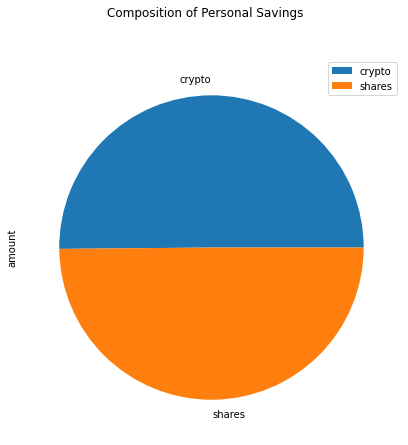

In [107]:
df_savings.plot(kind="pie", figsize=(7,7), title="Composition of Personal Savings", subplots=True)

In [112]:
emergency_fund = monthly_income * 3


total_savings = df_savings["amount"].sum()

total_savings

if total_savings > emergency_fund:
    
    print("Congratulations!! You have enough money in your emergency fund.")
    
elif total_savings == emergency_fund:
    
    print("Congratulations! You just reached the amount advised for your emergency fund.")
    
else:
    
    print(f"You are $ {emergency_fund - total_savings} away from completing your emergency fund.")

Congratulations!! You have enough money in your emergency fund.


In [113]:
start_date = pd.Timestamp('2016-12-10', tz='America/New_York').isoformat()

end_date = pd.Timestamp('2021-12-10', tz='America/New_York').isoformat()

In [114]:
df_stock_data = api.get_bars(
    
    tickers,
    
    timeframe,
    
    start=start_date,
    
    end=end_date,
    
    limit = 1000
    
).df

df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-12-12 05:00:00+00:00,107.70,107.8200,107.6100,107.74,3074224,13446,107.707448,AGG
2016-12-13 05:00:00+00:00,107.87,107.9400,107.7101,107.88,3665919,16051,107.836008,AGG
2016-12-14 05:00:00+00:00,108.07,108.1185,107.2900,107.29,3544087,15612,107.843680,AGG
2016-12-15 05:00:00+00:00,107.37,107.4200,107.1500,107.16,4619085,15629,107.282233,AGG
2016-12-16 05:00:00+00:00,107.16,107.3850,107.0600,107.23,2981686,13525,107.239653,AGG


In [115]:
MC_shares = MCSimulation(
    
    portfolio_data = df_stock_data,
    
    weights = [.40,.60],
    
    num_simulation = 500,
    
    num_trading_days = 252*30
    
)

IndexError: Too many levels: Index has only 1 level, not 2

In [116]:
MC_shares.portfolio_data.head()

NameError: name 'MC_shares' is not defined

In [117]:
MC_shares.calc_cumulative_return()

NameError: name 'MC_shares' is not defined

In [118]:
dist_plot = MC_shares.plot_distribution()

NameError: name 'MC_shares' is not defined

In [119]:
summary_tbl = MC_shares.summarize_cumulative_return()

NameError: name 'MC_shares' is not defined

In [120]:
print(summary_tbl)

NameError: name 'summary_tbl' is not defined